# Fraunhofer Diffraction (by Wolfram Language)

#### define the `Fraunhofer` function

In [1]:
Fraunhofer[$λ_,$a_,$d_,N_][showEnvelope_,scale_] := Module[
    {
        λ, a, d,
        α, envelope, γ, fringe,
        table,
        envelopePlot, fringePlot, fig
    },
    
    (* parameters *)
    λ = $λ 10^(-9);
    a = $a 10^(-6);
    d = $d a;
    
    (* table of parameters *)
    table = Column@{
        Row@{"λ=",$λ,"nm", Spacer@20, "a=",$a,"μm"},
        Row@{"d/a=",$d, Spacer@20, "N=",N}
    };
    
    (* fringe of single-slit diffraction *)
    α[s_] := Pi a s / λ;
    envelope[s_] := ( Sin[α@s] / α@s )^2;
    (* fringe of multi-slit diffraction *)
    γ[s_] := Pi d s / λ;
    fringe[s_] := envelope@s ( Sin[N γ@s] / Sin[γ@s] )^2;
    
    (* plots of waves *)
    envelopePlot := Plot[
        If[scale, (* scale the intensity to make secondary bright fringes more visible *)
            Sqrt[envelope@s N^2],
            envelope@s N^2
        ],
        {s,-1,1},
        PlotRange->{0,If[scale,N,N^2]},
        PlotStyle->{Gray,Thickness@Small}
    ];
    fringePlot := Plot[
        If[scale,
            Sqrt[fringe@s],
            fringe@s
        ],
        {s,-1,1},
        PlotRange->{0,If[scale,N,N^2]},
        PlotPoints->100,
        PlotStyle->{ColorData[68,"ColorList"][[1]],Thickness@Large}
    ];
    (* combine the plots into a single figure *)
    fig = Show[
        {
            If[showEnvelope, envelopePlot, Nothing],
            fringePlot
        },
        AxesLabel->{"sin θ","Intensity"}, AxesOrigin->{-1,0},
        ImageSize->Medium
    ];
    
    (* return *)
    Column@{ table, fig }
];

#### plot a static figure

λ=500nmSpacer[20]a=1μm
d/a=3Spacer[20]N=5
-Graphics-
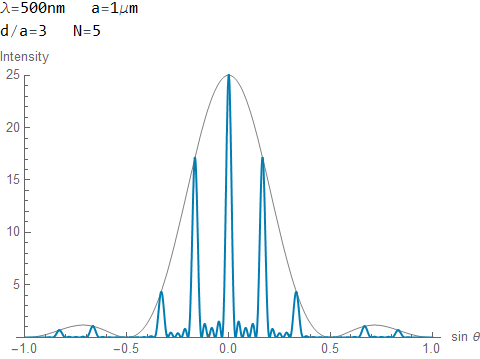

In [2]:
Fraunhofer[500,1,3,5][True,False]

#### create an interactive interface (export a CDF file)

In [ ]:
Export[
    FileNameJoin@{Directory[],"Fraunhofer.cdf"},
    Notebook[{Cell[BoxData@ToBoxes@#,"Output"]}, WindowSize->All],
    "CDF"
]& @
Manipulate[
    Fraunhofer[$λ,$a,$d,N][showEnvelope,scale],
    
    {{$λ, 500, "λ (nm)"}, 400,800,50},
    {{$a, 1  , "a (μm)"}, 1,5,1     },
    {{$d, 3  , "d/a"   }, 1,5,0.5   },
    {{N , 5  , "N"     }, 1,10,1    },
    {{showEnvelope, True , "show envelope"}, {True,False}},
    {{scale       , False, "scale"        }, {True,False}},
    TrackedSymbols->{$λ,$a,$d,N, showEnvelope,scale},
    
    ControlPlacement->Right,
    SaveDefinitions->True
]